# S&P 500 Analysis

## Import the Packages, Functions and Data

In [1]:
import pandas as pd
from EDA_functions import EDA, normality_check,stationarity_check,decomposition_plot,daily_returns
from Baseline_functions import capital_calculation, calculate_macd_signals, profit_trades, loss_trades
from DQN_functions import create_states, ReplayMemory, DQNAgent,train_agent,evaluate_agent, ConvDQN,plot_training,create_action_episode_df
import pandas as pd
import torch
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/nifty50.csv')
df.reset_index(drop=True, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.ffill()

## EDA

### Visual

In [3]:
EDA(df)

alt.VConcatChart(...)

In [4]:
df.describe()

Open          High           Low         Close     Adj Close  \
count   2464.000000   2464.000000   2464.000000   2464.000000   2464.000000   
mean   12282.732753  12339.474553  12204.791526  12273.959381  12273.959381   
std     4153.249619   4167.671841   4134.043208   4152.943852   4152.943852   
min     6654.149902   6688.399902   6638.549805   6652.549805   6652.549805   
25%     8646.050049   8682.874756   8586.049805   8635.400391   8635.400391   
50%    10904.024903  10952.375000  10830.375000  10890.949707  10890.949707   
75%    16233.000244  16321.737549  16146.125244  16241.562256  16241.562256   
max    22517.500000  22526.599609  22430.000000  22493.550781  22493.550781   

             Volume  daily_return  cumulative_return  
count  2.464000e+03   2464.000000        2464.000000  
mean   3.110391e+05      0.000542           1.826197  
std    1.979586e+05      0.010398           0.617901  
min    0.000000e+00     -0.129805           0.989808  
25%    1.797750e+05     -0.004327           1.284829  
50%    2.482500e+05      0.000705           1.620424  
75%    3.762250e+05      0.006133           2.416522  
max    1.811000e+06      0.087632           3.346732

### Without Differencing

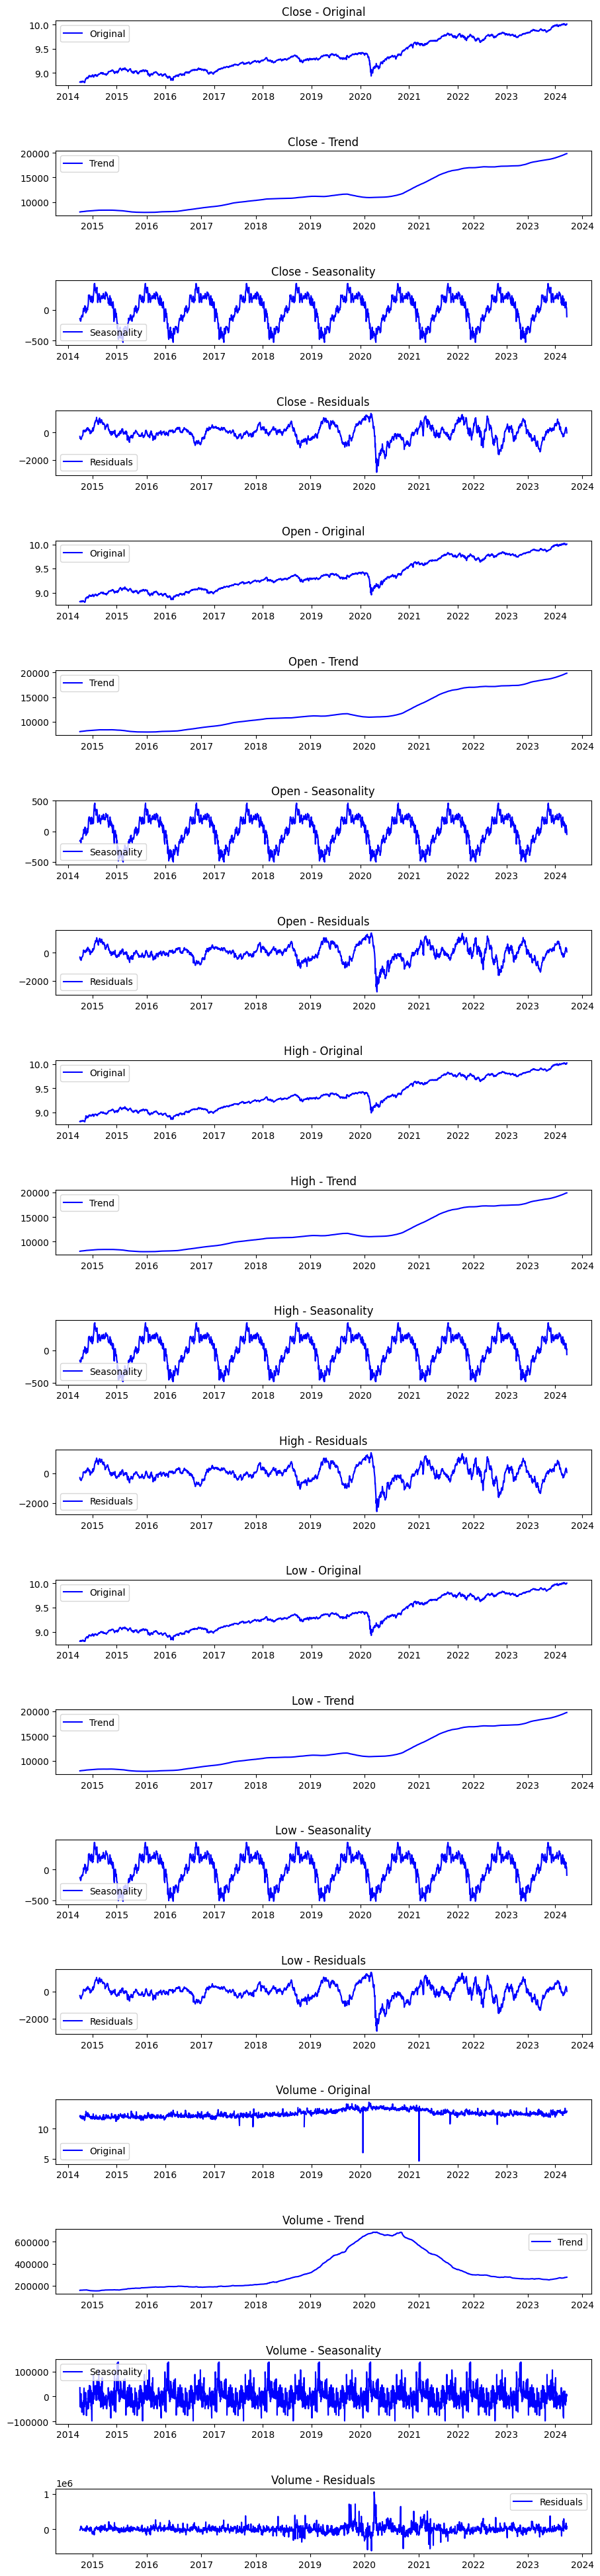

In [5]:
decomposition_plot(df,0)


Results of Dickey-Fuller Test for Close: 

Test Statistic                    0.555453
p-value                           0.986465
#Lags Used                        7.000000
Number of Observations Used    2456.000000
Critical Value (1%)              -3.433015
Critical Value (5%)              -2.862718
Critical Value (10%)             -2.567397
dtype: float64

Results of Dickey-Fuller Test for Open: 

Test Statistic                    0.412722
p-value                           0.981965
#Lags Used                        9.000000
Number of Observations Used    2454.000000
Critical Value (1%)              -3.433018
Critical Value (5%)              -2.862718
Critical Value (10%)             -2.567397
dtype: float64

Results of Dickey-Fuller Test for High: 

Test Statistic                    0.724967
p-value                           0.990323
#Lags Used                        6.000000
Number of Observations Used    2457.000000
Critical Value (1%)              -3.433014
Critical Value (5%)    

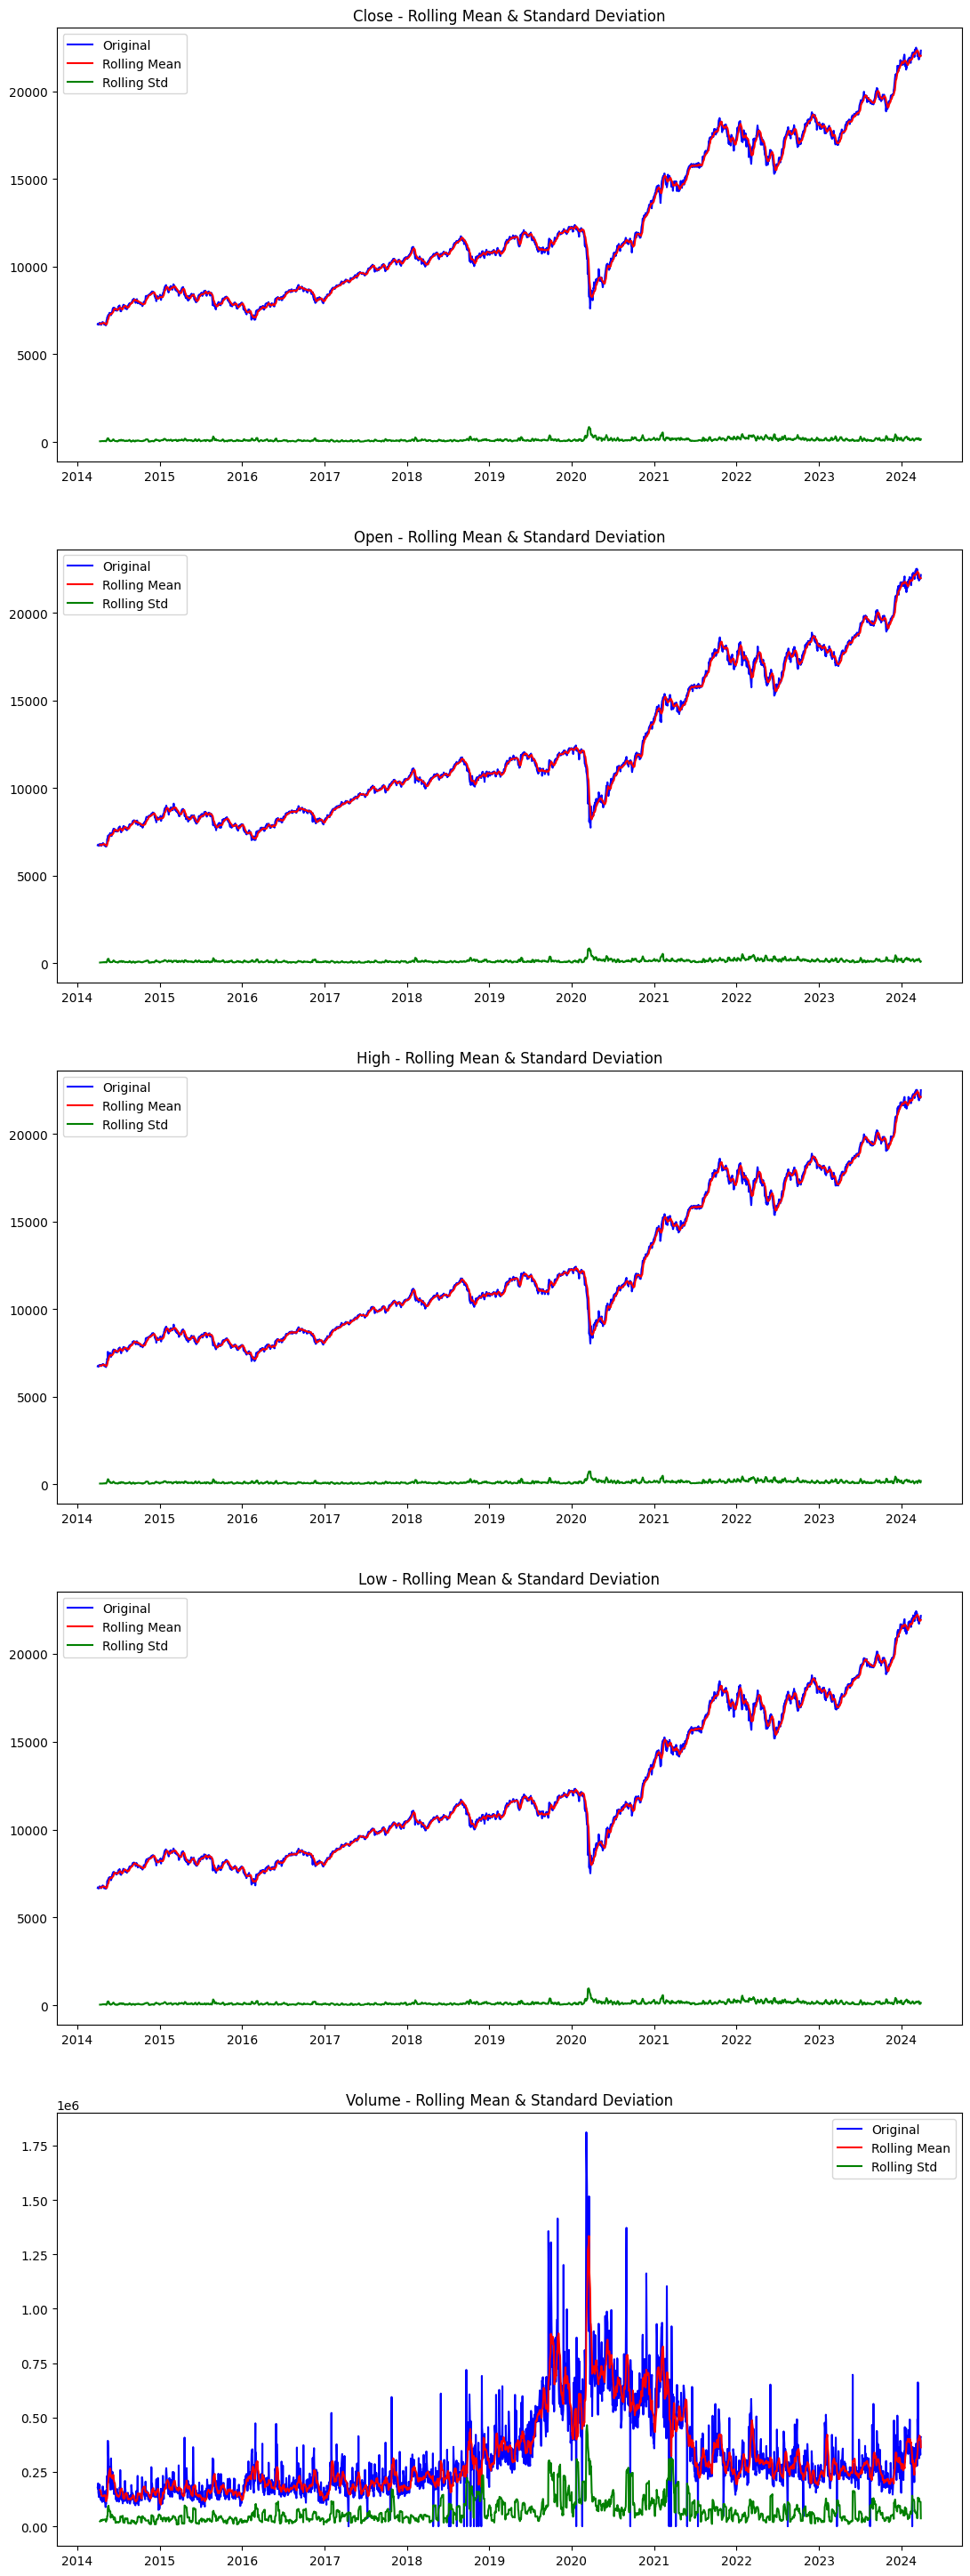

In [6]:
stationarity_check(df,0)

In [7]:
normality_check(df,0)


Normality Check for Close:
Jarque-Bera Test ---- statistic: 260.37888552028426, p-value: 2.880337689343444e-57
Normal Test ---- statistic: 386.5456029766523, p-value: 1.1552841409208667e-84

Normality Check for Open:
Jarque-Bera Test ---- statistic: 259.95028361859937, p-value: 3.568725364785122e-57
Normal Test ---- statistic: 388.45741825224144, p-value: 4.4416404475384866e-85

Normality Check for High:
Jarque-Bera Test ---- statistic: 260.18201084248255, p-value: 3.178294968014634e-57
Normal Test ---- statistic: 391.5735693870212, p-value: 9.351467697509627e-86

Normality Check for Low:
Jarque-Bera Test ---- statistic: 260.5066469142162, p-value: 2.702093501664894e-57
Normal Test ---- statistic: 380.85827011775564, p-value: 1.984620396096929e-83

Normality Check for Volume:
Jarque-Bera Test ---- statistic: 4363.252798091864, p-value: 0.0
Normal Test ---- statistic: 970.2655007009553, p-value: 2.039499166845087e-211


### After 1st Difference

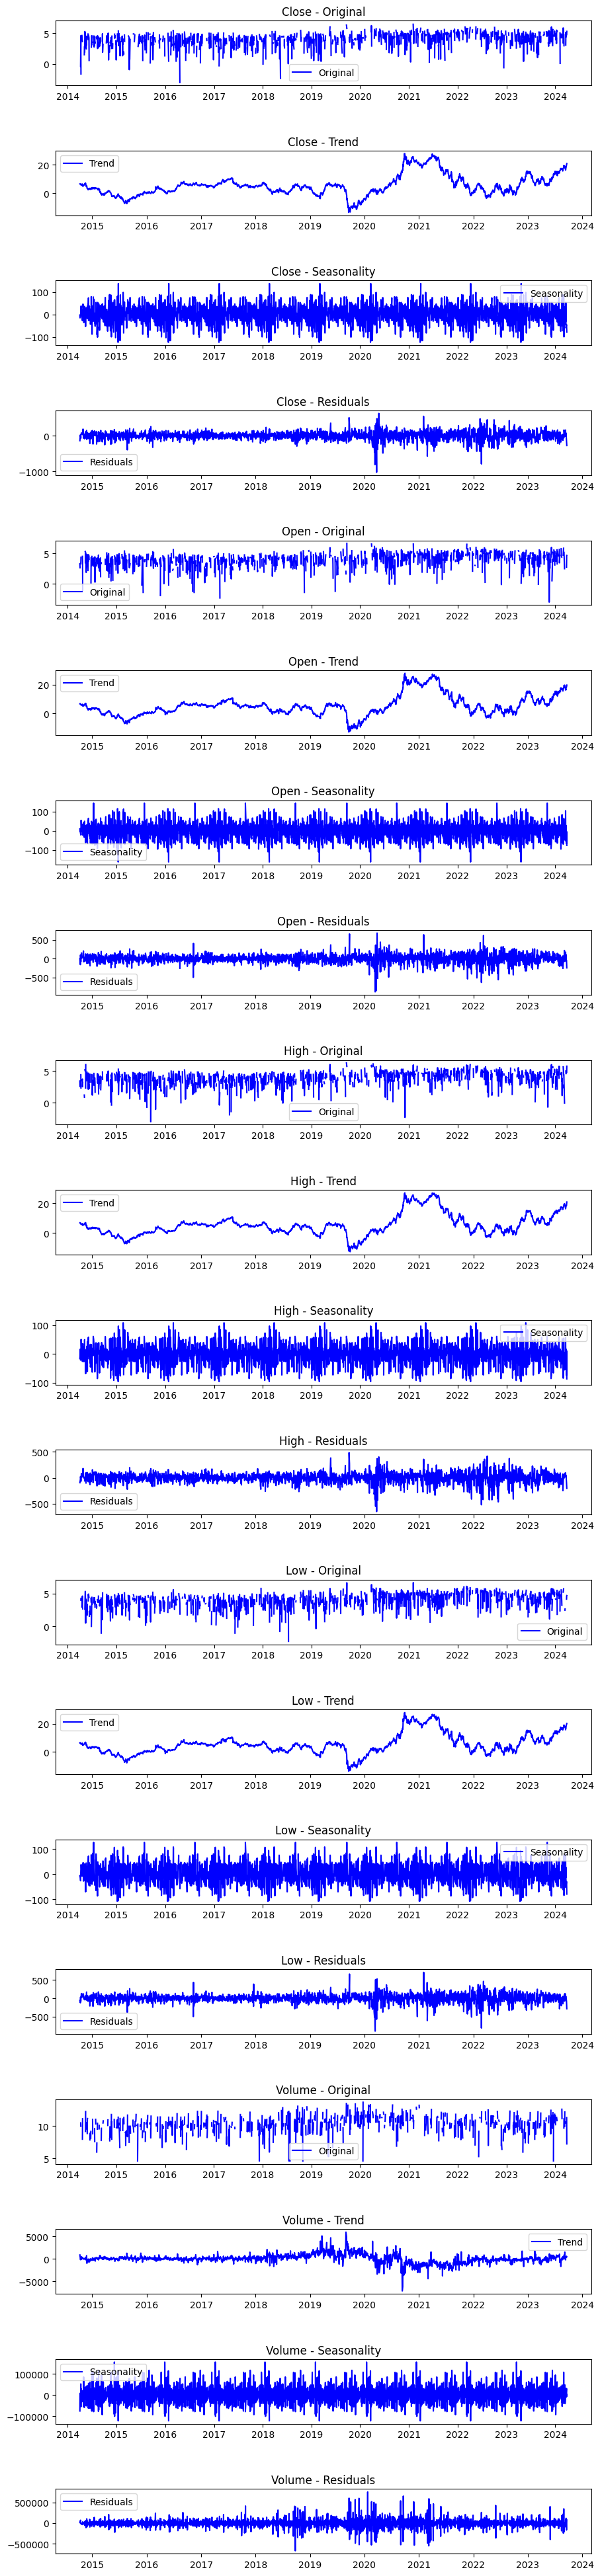

In [8]:
decomposition_plot(df,1)


Results of Dickey-Fuller Test for Close: 

Test Statistic                -1.818110e+01
p-value                        2.432889e-30
#Lags Used                     6.000000e+00
Number of Observations Used    2.456000e+03
Critical Value (1%)           -3.433015e+00
Critical Value (5%)           -2.862718e+00
Critical Value (10%)          -2.567397e+00
dtype: float64

Results of Dickey-Fuller Test for Open: 

Test Statistic                -1.567223e+01
p-value                        1.507816e-28
#Lags Used                     8.000000e+00
Number of Observations Used    2.454000e+03
Critical Value (1%)           -3.433018e+00
Critical Value (5%)           -2.862718e+00
Critical Value (10%)          -2.567397e+00
dtype: float64

Results of Dickey-Fuller Test for High: 

Test Statistic                  -19.436596
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    2457.000000
Critical Value (1%)              -3.433014
Critical 

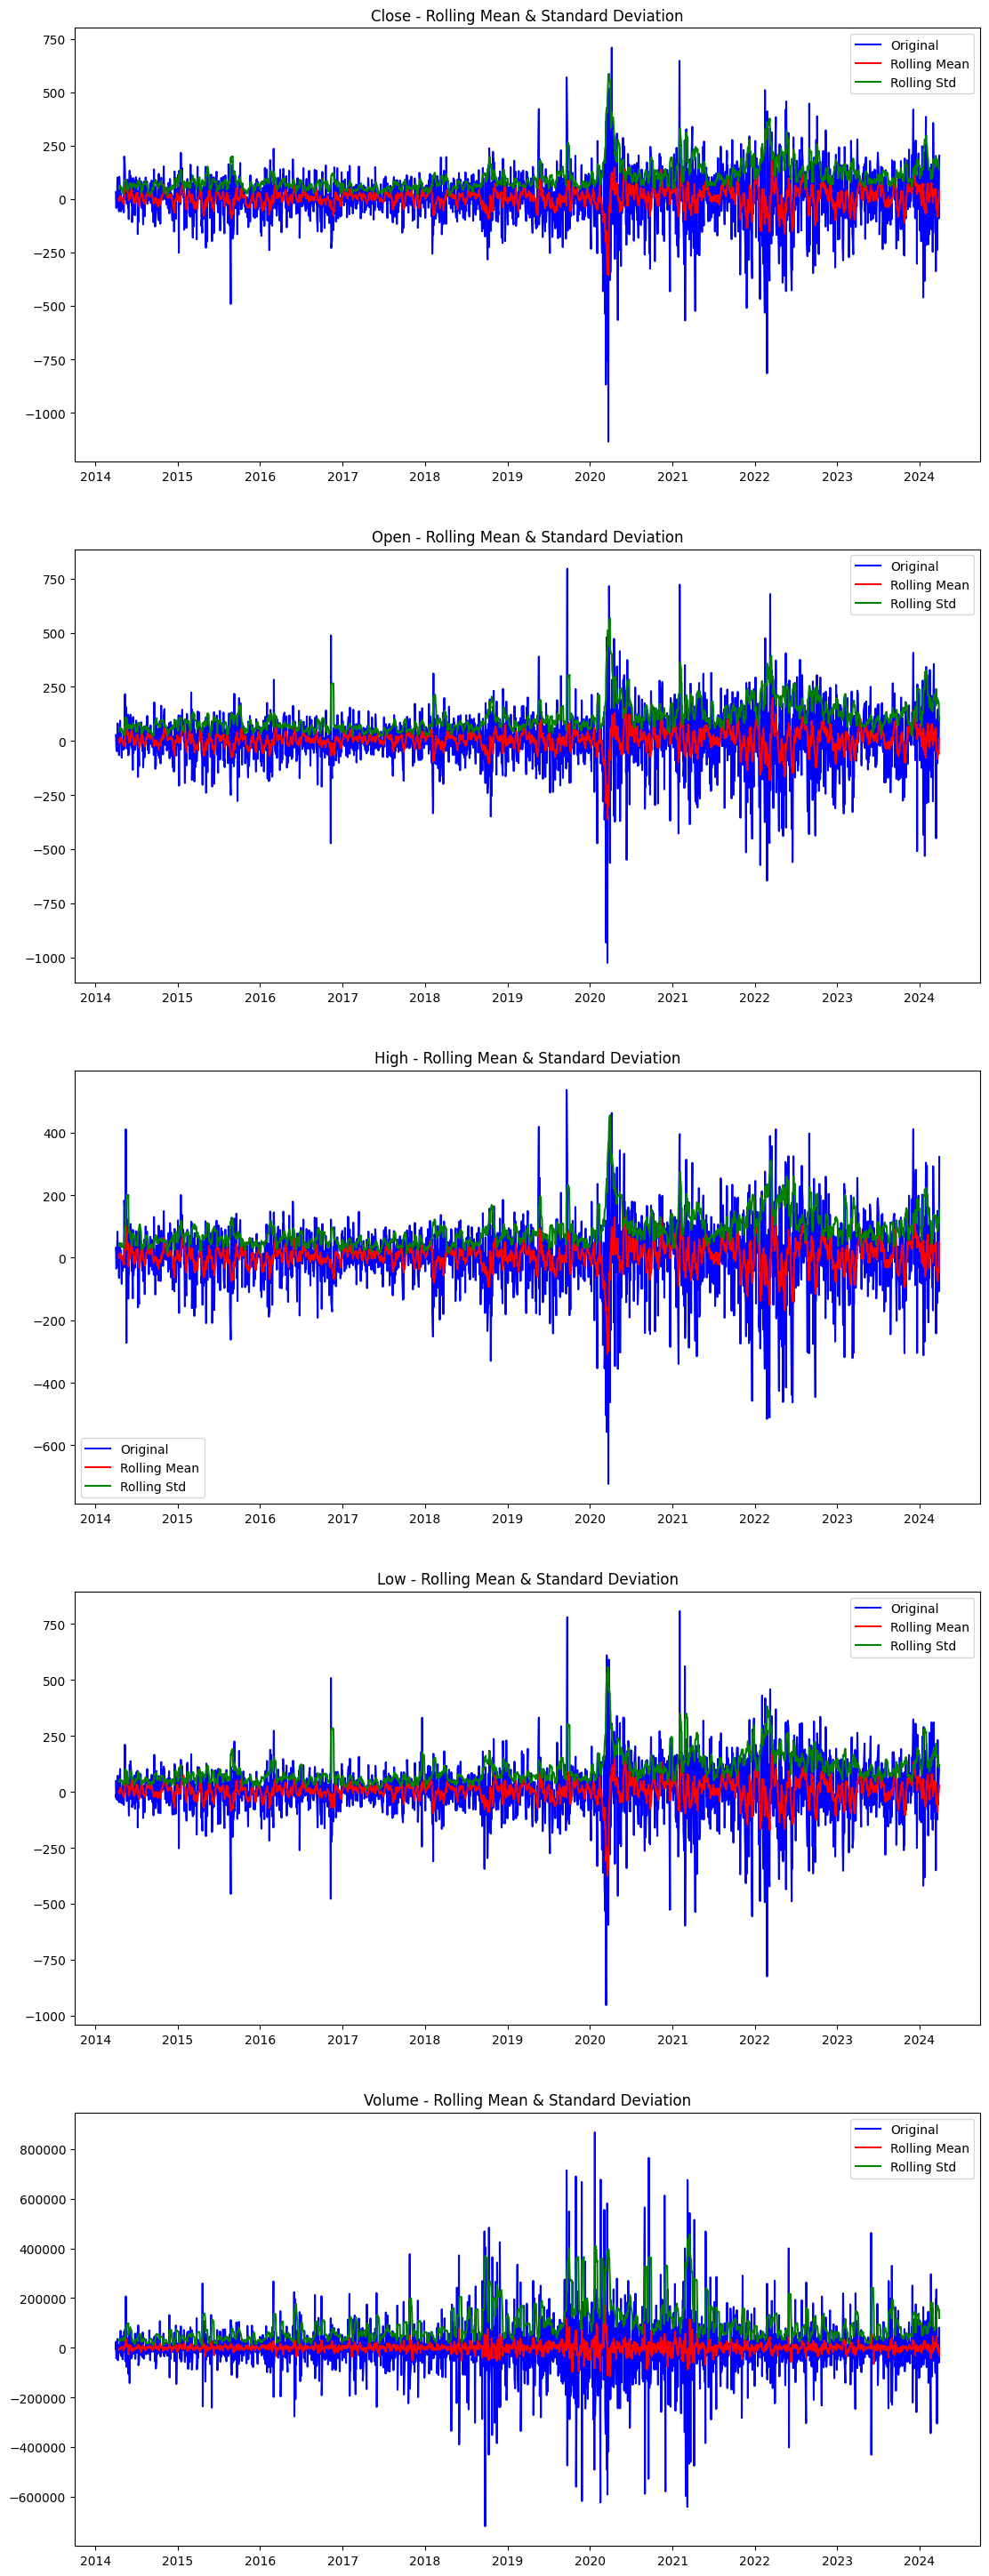

In [9]:
stationarity_check(df,1)

In [10]:
normality_check(df,1)


Normality Check for Close:
Jarque-Bera Test ---- statistic: 6749.447891372556, p-value: 0.0
Normal Test ---- statistic: 592.0431926731562, p-value: 2.750769414548099e-129

Normality Check for Open:
Jarque-Bera Test ---- statistic: 4120.324411748448, p-value: 0.0
Normal Test ---- statistic: 431.5946114770448, p-value: 1.9073083416284405e-94

Normality Check for High:
Jarque-Bera Test ---- statistic: 2340.7169913176344, p-value: 0.0
Normal Test ---- statistic: 381.86757695211634, p-value: 1.1981446585528062e-83

Normality Check for Low:
Jarque-Bera Test ---- statistic: 5926.235397219519, p-value: 0.0
Normal Test ---- statistic: 500.8152579761139, p-value: 1.7756137686173769e-109

Normality Check for Volume:
Jarque-Bera Test ---- statistic: 12953.843086378994, p-value: 0.0
Normal Test ---- statistic: 526.7770220462814, p-value: 4.090939585487872e-115


### Outlier Check

Since price gradually increases, it does not make sense to use traditional outlier checking methods. Therefore we calculate the daily change and then the outliers in those

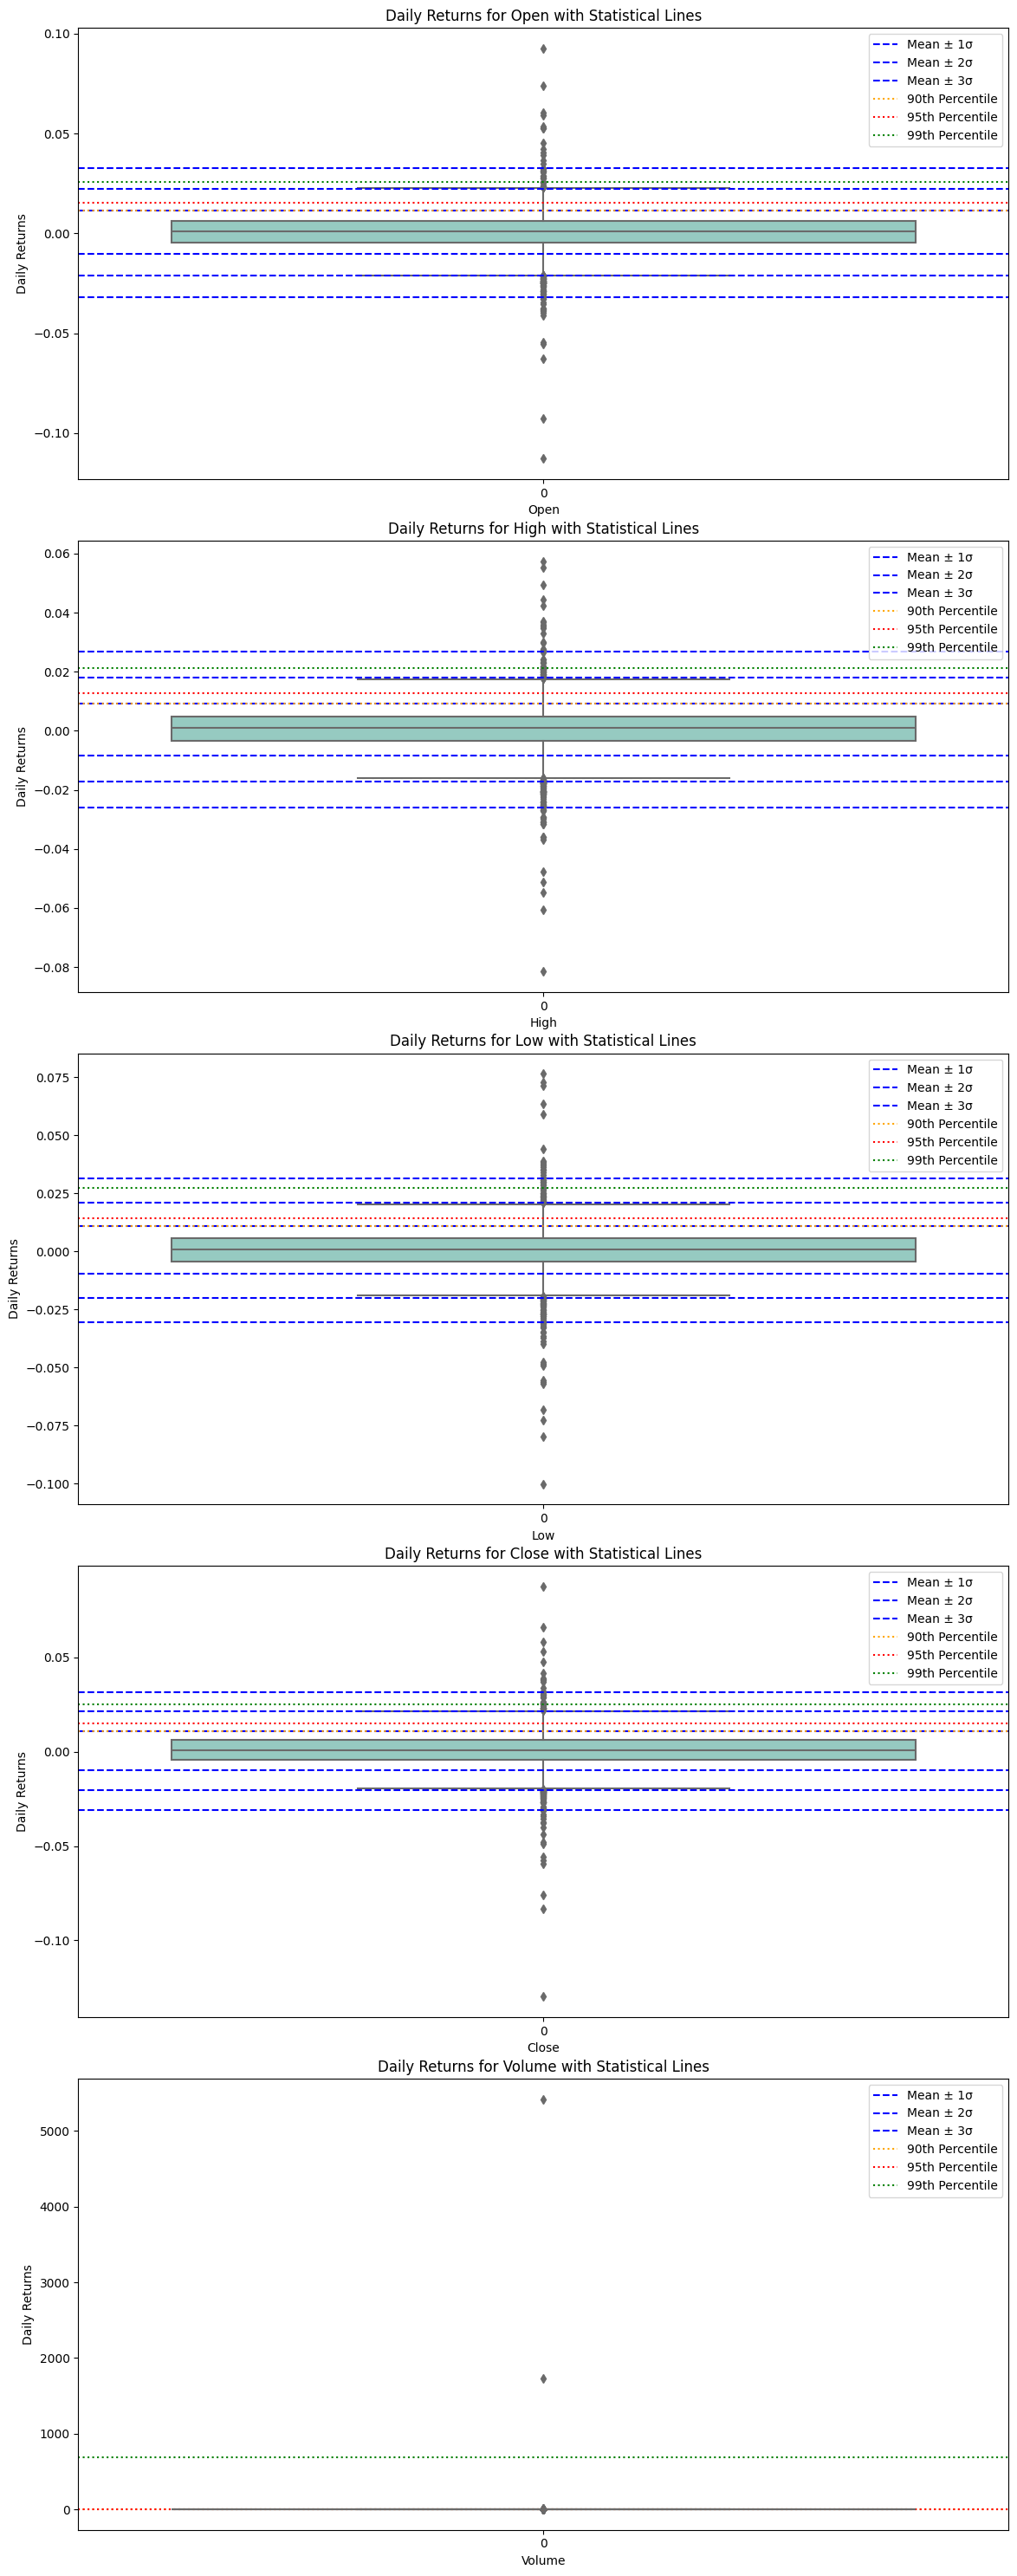

In [11]:
daily_returns(df)

## Outlier Removal 


In [12]:
df['daily_return'] = df['Close'].pct_change()
df['daily_return'] = df['daily_return'].fillna(0)
#mean plus 3sigma value for absolute daily returns
mean = df['daily_return'].mean()
std = df['daily_return'].std()
upper_limit = mean + 2*std
lower_limit = mean - 2*std
print(f'Mean: {mean}, Std: {std}, Upper Limit: {upper_limit}, Lower Limit: {lower_limit}')
#number of rows that are outside the 3 sigma range
print(f'Number of rows outside 2 sigma range: {len(df[(df["daily_return"]>upper_limit) | (df["daily_return"]<lower_limit)])}')
print(f'Percentage of rows outside 2 sigma range: {len(df[(df["daily_return"]>upper_limit) | (df["daily_return"]<lower_limit)])/len(df)*100}% ')

#if daily return is outside 3 sigma range, replace all the values with previous day's values
for i in range(1,len(df)):
    if df['daily_return'][i]>upper_limit or df['daily_return'][i]<lower_limit:
        df['Close'][i] = df['Close'][i-1]
        df['Open'][i] = df['Open'][i-1]
        df['High'][i] = df['High'][i-1]
        df['Low'][i] = df['Low'][i-1]
        df['Volume'][i] = df['Volume'][i-1]
        df['daily_return'][i] = 'NaN'

Mean: 0.0005418251452384599, Std: 0.010398129961910068, Upper Limit: 0.021338085069058595, Lower Limit: -0.020254434778581677
Number of rows outside 2 sigma range: 97
Percentage of rows outside 2 sigma range: 3.936688311688312% 


## Baseline Models


In [13]:
df_base = calculate_macd_signals(df)

Total Pofit: 48.21276557325862
Final Capital: 148.21276557325862
Overall Return: 48.21276557325862
Overall Return %: 48.21276557325862
Number of Days: 2463
Number of Trades: 350
Ratio of Trades to Days:  0.1421031262687779


In [14]:
df_base = profit_trades(df_base)

Total Pofit: 28026.821155499667
Final Capital: 28126.821155499667
Overall Return: 28026.821155499667
Overall Return %: 28026.82115549967
Number of Days: 2463
Number of Trades: 343
Ratio of Trades to Days:  0.13926106374340236


In [15]:
df_base = loss_trades(df_base)

Total Pofit: -99.07014537591384
Final Capital: 0.9298546240861549
Overall Return: -99.07014537591384
Overall Return %: -99.07014537591384
Number of Days: 2463
Number of Trades: 348
Ratio of Trades to Days:  0.14129110840438489


## DQN

### Training

In [16]:
df_base = df[['Open','High','Low','Close','Volume']]
#include 26 and 12 ema
df_base['26ema'] = df_base['Close'].ewm(span=26).mean()
df_base['12ema'] = df_base['Close'].ewm(span=12).mean()
#fill na as 0
df_base = df_base.dropna()
df_base = df_base[['Open','High','Low','Close','Volume','26ema','12ema']]

#first 80% of the data is train
df_train = df_base.iloc[:int(len(df_base)*0.8)]
#last 20% of the data is test
df_test = df_base.iloc[int(len(df_base)*0.8):]

In [17]:
display(df_train.head())

display(df_test.head())

Open         High          Low        Close    Volume  \
Date                                                                       
2014-04-01  6729.500000  6732.250000  6675.450195  6721.049805  177800.0   
2014-04-02  6757.600098  6763.500000  6723.600098  6752.549805  173300.0   
2014-04-03  6772.049805  6776.750000  6696.899902  6736.100098  197500.0   
2014-04-04  6741.850098  6741.850098  6685.149902  6694.350098  155100.0   
2014-04-07  6694.250000  6725.149902  6650.399902  6695.049805  133900.0   

                  26ema        12ema  
Date                                  
2014-04-01  6721.049805  6721.049805  
2014-04-02  6737.405574  6738.112305  
2014-04-03  6736.936529  6737.326940  
2014-04-04  6725.031224  6723.760831  
2014-04-07  6718.078409  6715.960148

Open          High           Low         Close    Volume  \
Date                                                                           
2022-03-31  17519.199219  17559.800781  17435.199219  17464.750000  281100.0   
2022-04-01  17436.900391  17703.699219  17422.699219  17670.449219  291800.0   
2022-04-04  17436.900391  17703.699219  17422.699219  17670.449219  291800.0   
2022-04-05  18080.599609  18095.449219  17921.550781  17957.400391  283500.0   
2022-04-06  17842.750000  17901.000000  17779.849609  17807.650391  328800.0   

                   26ema         12ema  
Date                                    
2022-03-31  17107.043908  17207.191859  
2022-04-01  17148.777635  17278.462222  
2022-04-04  17187.419974  17338.767914  
2022-04-05  17244.455561  17433.942141  
2022-04-06  17286.173696  17491.435718

In [18]:
print(df_train.shape, df_test.shape)
print(df_train.shape[0] + df_test.shape[0])
print(df.shape[0])

(1971, 7) (493, 7)
2464
2464


In [19]:
window_size = 26
states = create_states(df_train, window_size)
test_states = create_states(df_test, window_size)
input_dim_conv = states.shape[2]
output_dim = 3
print("Shape of states:", states.shape)

Shape of states: (1945, 26, 7)


In [20]:
model = ConvDQN(input_dim_conv, output_dim, window_size)
memory = ReplayMemory(50000)
agent = DQNAgent(input_dim_conv, output_dim, window_size,model, lr=0.0001, gamma=0.95, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.9995)

In [21]:
%%time
log_train = train_agent(agent, states, 800, batch_size=32)

Episode 1/800, Total Reward: 100.0, Loss: 10.015088497554173
Episode 2/800, Total Reward: 69.0, Loss: 11.137294189543832
Episode 3/800, Total Reward: 142.25, Loss: 10.40558866569922
Episode 4/800, Total Reward: -309.0325783716789, Loss: 9.720042083138955
Episode 5/800, Total Reward: 121.58226522000281, Loss: 10.368258091632573
Episode 6/800, Total Reward: 522.6992180000016, Loss: 10.456361243887516
Episode 7/800, Total Reward: 619.548827999999, Loss: 9.646489129827923
Episode 8/800, Total Reward: 13.772344327136526, Loss: 9.738117019719263
Episode 9/800, Total Reward: -169.45117200000095, Loss: 10.281519636397315
Episode 10/800, Total Reward: -111.17691394920065, Loss: 9.54173276371939
Episode 11/800, Total Reward: 720.5996090000008, Loss: 10.240692361162719
Episode 12/800, Total Reward: 368.2256832900007, Loss: 9.27474543083892
Episode 13/800, Total Reward: 409.1396481000007, Loss: 9.950163783774126
Episode 14/800, Total Reward: 336.7575, Loss: 9.40303897150304
Episode 15/800, Total R

In [ ]:
log_train.to_csv('NIFTY50/log_train_CNN_updated_reward_MA_800ep.csv', index=False)

In [ ]:
#save the model
torch.save(agent.model.state_dict(), 'NIFTY50/DQN_CNN_updated_reward_MA_800ep.pth')

### Evaluating and Testing

In [ ]:
log_train = pd.read_csv('NIFTY50/log_train_CNN_updated_reward_MA_800ep.csv')

In [ ]:
log_train.rename(columns={'Reward':'Training_reward'}, inplace=True)

In [ ]:
reward =[]
for i in range(1,log_train['Episode'].max()+1):
    last_episode = log_train[log_train['Episode'] == i]
    last_episode.reset_index(drop=True, inplace=True)
    last_episode['Close'] = last_episode['Price'].to_list()
    blockPrint()
    reward.append(list(capital_calculation(last_episode,'Action'))[-1]-100)

In [ ]:
log_train['Reward'] = log_train['Episode'].apply(lambda x: reward[x-1])

In [ ]:
plot_training(log_train)

In [ ]:
log_train

In [ ]:
action_episode_df = create_action_episode_df(log_train)

In [ ]:
action_episode_df = action_episode_df.apply(pd.Series.value_counts).transpose().reset_index()

In [ ]:
#get value counts of all columns in the DataFrame
action_episode_df[['Buy']].plot()

In [ ]:
# Initialize the agent
test_state_size = test_states.shape[2]
action_size = 3
agent = DQNAgent(test_state_size, output_dim, window_size,model, lr=0.0001, gamma=0.95, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.9995)

In [ ]:
test_state_size

In [ ]:
model_path = 'NIFTY50/DQN_CNN_updated_reward_MA_800ep.pth'
agent.model.load_state_dict(torch.load(model_path))

# Ensure the model is in evaluation mode
agent.model.eval()

In [ ]:
evaluation_log = evaluate_agent(agent, test_states)

In [ ]:
evaluation_log['Close'] = evaluation_log['Price']
evaluation_log['Capital'] = capital_calculation(evaluation_log, 'Action')

In [ ]:
evaluation_log

In [ ]:
all_states = create_states(df_base, window_size)
all_states_eval = evaluate_agent(agent, all_states)

In [ ]:
all_states_eval['Close'] = all_states_eval['Price']
all_states_eval['Capital'] = capital_calculation(all_states_eval, 'Action')
all_states_eval

##